## Parameters
- model = Naive counting
- train= week (2018-07-01 to 2018-07-07)
- prediction_horizon = one day
- validation = nested-cross; day-forward chaining
- db = SIEDCO, NUSE, RNMC

## Hypothesis:
Higher hit-rates are observed on scenarios with more data available

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from services.prediction_experiment import PredictionExperiment

Failed to import `rtree`.
Failed to import `rtree`.


In [2]:
def get_value(row,c):
    return row['Hit-rates'][c]

In [4]:
filter_localidad = {'field':'LOCALIDAD','value':'SANTA FE'}
train_dates = {'initial':'2018-07-01','final':'2018-07-07'}
model = "NaiveCounting"
metrics = ''
aggregation = ''

## SIEDCO

In [5]:
csv_path = '/Users/anamaria/Desktop/dev/security_project/datasets/deduplicate_siedco_10032020.csv'
siedco_info = {'name':'SIEDCO','path':csv_path}

In [6]:
santa_fe_experiment = PredictionExperiment(dataset_info=siedco_info, custom_filter=filter_localidad,train_dates=train_dates,model=model,metrics='',aggregation_data='')
accuracy_array = santa_fe_experiment.run_ncv_experiment(time_unit='',grid_size=150, outer_iterations='')

In [7]:
flat_list = [item for sublist in accuracy_array for item in sublist]
df_result = pd.DataFrame(flat_list, columns =['Prediction-time', 'Hit-rates'])
coverages = [2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0]
for c in coverages:
    column = 'coverage_'+str(c)
    df_result[column] = df_result.apply(lambda row: get_value(row,c), axis=1)

In [8]:
df_siedco = df_result.copy()

In [27]:
#delete datetimes where no crimes were reported (0 crimes on ground truth -> hit-rate = -1)
df_siedco = df_siedco[df_siedco['coverage_2.0']!= -1]
df_siedco.mean()

coverage_2.0     0.000000
coverage_4.0     0.000000
coverage_6.0     0.000000
coverage_8.0     0.000000
coverage_10.0    0.000000
coverage_12.0    0.000000
coverage_14.0    0.000000
coverage_16.0    0.000000
coverage_18.0    0.027778
coverage_20.0    0.027778
dtype: float64

In [10]:
df_siedco['date'] = pd.to_datetime(df_siedco['Prediction-time']).dt.date
df_by_date = df_siedco.groupby(['date']).mean().reset_index()

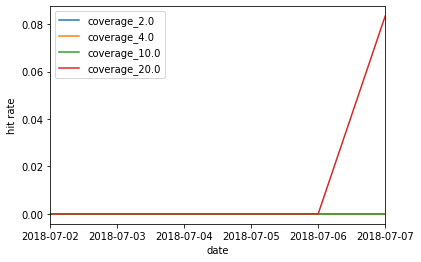

In [11]:
# gca stands for 'get current axis'
ax = plt.gca()

df_by_date.plot(kind='line',x='date',y='coverage_2.0',ax=ax)
df_by_date.plot(kind='line',x='date',y='coverage_4.0', ax=ax)
df_by_date.plot(kind='line',x='date',y='coverage_10.0', ax=ax)
df_by_date.plot(kind='line',x='date',y='coverage_20.0', ax=ax)
ax.set_ylabel('hit rate')

plt.show()

## NUSE

In [12]:
csv_path = '/Users/anamaria/Desktop/dev/security_project/datasets/06. verify_enrich_nuse_11022020.csv'
nuse_info = {'name':'NUSE','path':csv_path}

In [13]:
santa_fe_experiment = PredictionExperiment(dataset_info=nuse_info, custom_filter=filter_localidad,train_dates=train_dates,model=model,metrics='',aggregation_data='')
accuracy_array = santa_fe_experiment.run_ncv_experiment(time_unit='',grid_size=150, outer_iterations='')

/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  


In [14]:
flat_list = [item for sublist in accuracy_array for item in sublist]
df_result = pd.DataFrame(flat_list, columns =['Prediction-time', 'Hit-rates'])
coverages = [2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0]
for c in coverages:
    column = 'coverage_'+str(c)
    df_result[column] = df_result.apply(lambda row: get_value(row,c), axis=1)

In [15]:
df_nuse = df_result.copy()

In [16]:
#delete datetimes where no crimes were reported (0 crimes on ground truth -> hit-rate = -1)
df_nuse = df_nuse[df_nuse['coverage_2.0']!= -1]
df_nuse.mean()

coverage_2.0     0.209947
coverage_4.0     0.266877
coverage_6.0     0.324129
coverage_8.0     0.346857
coverage_10.0    0.346857
coverage_12.0    0.346857
coverage_14.0    0.351907
coverage_16.0    0.351907
coverage_18.0    0.356039
coverage_20.0    0.356039
dtype: float64

In [17]:
df_nuse['date'] = pd.to_datetime(df_nuse['Prediction-time']).dt.date
df_by_date = df_nuse.groupby(['date']).mean().reset_index()

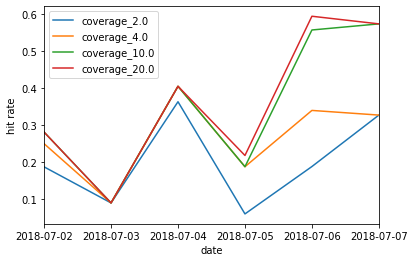

In [18]:
# gca stands for 'get current axis'
ax = plt.gca()

df_by_date.plot(kind='line',x='date',y='coverage_2.0',ax=ax)
df_by_date.plot(kind='line',x='date',y='coverage_4.0', ax=ax)
df_by_date.plot(kind='line',x='date',y='coverage_10.0', ax=ax)
df_by_date.plot(kind='line',x='date',y='coverage_20.0', ax=ax)
ax.set_ylabel('hit rate')

plt.show()

## RNMC

In [19]:
csv_path = '/Users/anamaria/Desktop/dev/security_project/datasets/06. verify_enrich_rnmc_12022020.csv'
rnmc_info = {'name':'RNMC','path':csv_path}
filter_localidad = {'field':'NOMBRE_LOCALIDAD','value':'SANTA FE'}

In [20]:
santa_fe_experiment = PredictionExperiment(dataset_info=rnmc_info, custom_filter=filter_localidad,train_dates=train_dates,model=model,metrics='',aggregation_data='')
accuracy_array = santa_fe_experiment.run_ncv_experiment(time_unit='',grid_size=150, outer_iterations='')

/Users/anamaria/Desktop/dev/security_project/security_venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  


In [21]:
flat_list = [item for sublist in accuracy_array for item in sublist]
df_result = pd.DataFrame(flat_list, columns =['Prediction-time', 'Hit-rates'])
coverages = [2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0]
for c in coverages:
    column = 'coverage_'+str(c)
    df_result[column] = df_result.apply(lambda row: get_value(row,c), axis=1)

In [22]:
df_rnmc = df_result.copy()

In [23]:
#delete datetimes where no crimes were reported (0 crimes on ground truth -> hit-rate = -1)
df_rnmc = df_rnmc[df_rnmc['coverage_2.0']!= -1]
df_rnmc.mean()

coverage_2.0     0.263951
coverage_4.0     0.320133
coverage_6.0     0.352915
coverage_8.0     0.361610
coverage_10.0    0.361610
coverage_12.0    0.361610
coverage_14.0    0.361610
coverage_16.0    0.361610
coverage_18.0    0.361610
coverage_20.0    0.380069
dtype: float64

In [24]:
df_rnmc['date'] = pd.to_datetime(df_rnmc['Prediction-time']).dt.date
df_by_date = df_rnmc.groupby(['date']).mean().reset_index()

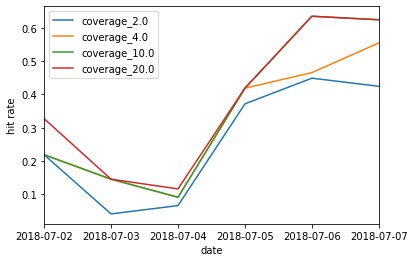

In [25]:
# gca stands for 'get current axis'
ax = plt.gca()

df_by_date.plot(kind='line',x='date',y='coverage_2.0',ax=ax)
df_by_date.plot(kind='line',x='date',y='coverage_4.0', ax=ax)
df_by_date.plot(kind='line',x='date',y='coverage_10.0', ax=ax)
df_by_date.plot(kind='line',x='date',y='coverage_20.0', ax=ax)
ax.set_ylabel('hit rate')

plt.show()

## Coverage vs hit rates

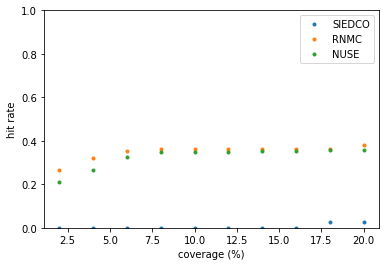

In [26]:
ax = plt.gca()
plt.plot(coverages,df_siedco.mean(),'.',label='SIEDCO')
plt.plot(coverages,df_rnmc.mean(),'.',label='RNMC')
plt.plot(coverages,df_nuse.mean(),'.',label='NUSE')
legend = ax.legend(loc='best')
ax.set_ylabel('hit rate')
ax.set_xlabel('coverage (%)')
plt.ylim(0, 1)
plt.show()

In [28]:
from services.process_data import ProcessData
path ='/Users/anamaria/Desktop/dev/security_project/aggressive_behavior_model/pkl/'
file_name = 'coverage_vs_hitrate_santa_fe_counting'
ProcessData.save_element(path,file_name,df_siedco)